<a href="https://colab.research.google.com/github/Sama733700/Machine-Learning-Predictions/blob/IEE-Data-Analysis-CI-Mini-Project/IEE_Mini_Project_updated_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

In [ ]:
math_exam_scores = pd.read_csv("/content/exams.csv")

In [ ]:
math_exam_scores=math_exam_scores.sample(n=49)


In [ ]:
#statistics of data
math_exam_scores.describe()

,math
count,49.000000
mean,67.551020
std,13.549387
min,26.000000
25%,59.000000
50%,69.000000
75%,79.000000
max,100.000000


In [ ]:
math_exam_scores.head()


,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math
637,female,group D,some high school,standard,completed,80
256,female,group C,associate's degree,free/reduced,none,64
549,male,group C,master's degree,standard,none,79
433,female,group A,some high school,free/reduced,none,47
863,female,group C,some college,standard,completed,71


In [63]:
exam_scores_data = math_exam_scores["math"]


In [64]:
exam_scores_data.head()

637    80
256    64
549    79
433    47
863    71
Name: math, dtype: int64

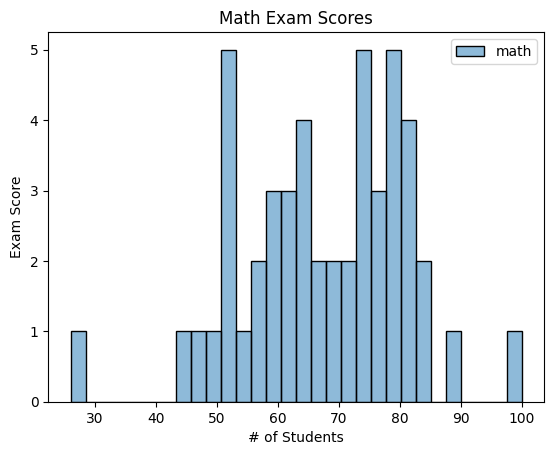

In [65]:
# histogram plot
sns.histplot(data=math_exam_scores, bins=30, kde=False, color='blue')

# Adding labels and title
plt.xlabel('# of Students')
plt.ylabel('Exam Score')
plt.title('Math Exam Scores')

# Display the plot
plt.show()


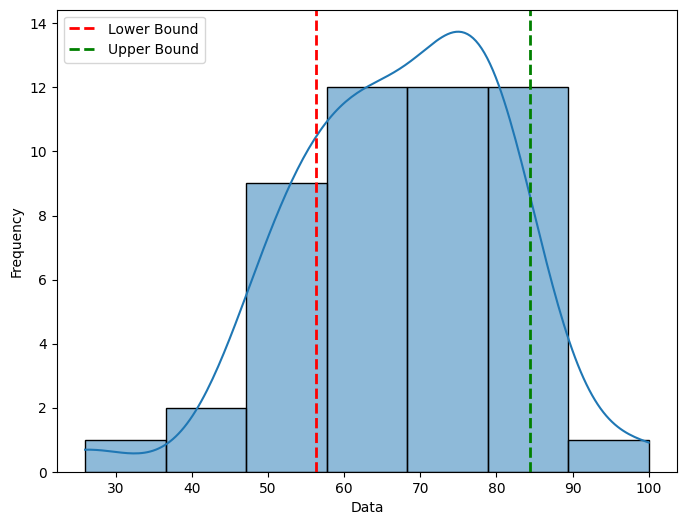

{'Lower Bound': 56.25189967906964, 'Upper Bound': 84.47825004535787}


In [66]:
def create_confidence_interval(data, column_name, alpha=0.05):
    # Extract the data from the specified column
    exam_scores_data = data[column_name]

    # Calculate the sample standard deviation
    sample_std = np.std(exam_scores_data, ddof=1)

    # Calculate the degrees of freedom
    df = len(exam_scores_data) - 1

    # Calculate the chi-squared critical values
    chi2_critical_lower = chi2.ppf(alpha / 2, df)
    chi2_critical_upper = chi2.ppf(1 - alpha / 2, df)

    # Calculate the confidence interval for the standard deviation
    lower_bound_std = sample_std * np.sqrt(df / chi2_critical_upper)
    upper_bound_std = sample_std * np.sqrt(df / chi2_critical_lower)

    # Calculate the confidence interval in the original data scale
    lower_bound = np.mean(exam_scores_data) - lower_bound_std
    upper_bound = np.mean(exam_scores_data) + upper_bound_std

    # Create a histogram of the data with upper and lower bounds
    plt.figure(figsize=(8, 6))
    sns.histplot(exam_scores_data, kde=True)
    plt.axvline(lower_bound, color='red', linewidth=2, linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='green', linewidth=2, linestyle='--', label='Upper Bound')
    plt.xlabel('Data')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Return the confidence interval for the standard deviation in the original data scale
    return {"Lower Bound": lower_bound, "Upper Bound": upper_bound}

# Example usage
confidence_interval = create_confidence_interval(math_exam_scores, "math")
print(confidence_interval)

In [67]:
print(lower_bound)

56.25189967906964


In [68]:
print(upper_bound)


84.47825004535787
